Using modified Navier–Stokes equations:

Momentum Equation:
$$\frac{\partial v}{\partial t}+u\frac{\partial v}{\partial x}+v\frac{\partial v}{\partial y}=-\frac{1}{\rho}\frac{\partial p}{\partial y}+\nu\left(\frac{\partial^2 v}{\partial x^2}+\frac{\partial^2 v}{\partial y^2}\right)$$

$$\frac{\partial^2 p}{\partial x^2}+\frac{\partial^2 p}{\partial y^2} = \rho\left(\frac{\partial}{\partial t}\left(\frac{\partial u}{\partial x} +\frac{\partial v}{\partial y} \right) - \frac{\partial u}{\partial x}\frac{\partial u}{\partial x}-2\frac{\partial u}{\partial y}\frac{\partial v}{\partial x}-\frac{\partial v}{\partial y}\frac{\partial v}{\partial y} \right)$$

Initial condition: 

$u, v, p=0$

Boundary conditions are:

$u, v =0$ at $y =0$

$u, v =5$ at $y =2$

$\frac{\partial p}{\partial y}=0$ at $y =0,2$


In [7]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
from src import *

In [8]:
# Domain size
nx = 50
ny = 50
Lx = 2.0
Ly = 1.0

dx = Lx / (nx - 1)
dy = Ly / (ny - 1)

# Time-stepping
dt = 0.001
nt = 5000

# Fluid properties
rho = 1
nu = 0.2  # kinematic viscosity

In [9]:
# Pressure gradient
dpdx = 0.0  # drives the flow in x

# Initialization
u = np.zeros((ny, nx))  # x-velocity
v = np.zeros((ny, nx))  # y-velocity
p = np.zeros((ny, nx))  # pressure
b = np.zeros((ny, nx))  # RHS of pressure Poisson

In [10]:
# Boundary Conditions
u[0, :] = 0
u[-1, :] = 5
v[0, :] = 0
v[-1, :] = 0

data = solver(dx, dy, u, v, rho, p, b, dt, nt, nu, dpdx)

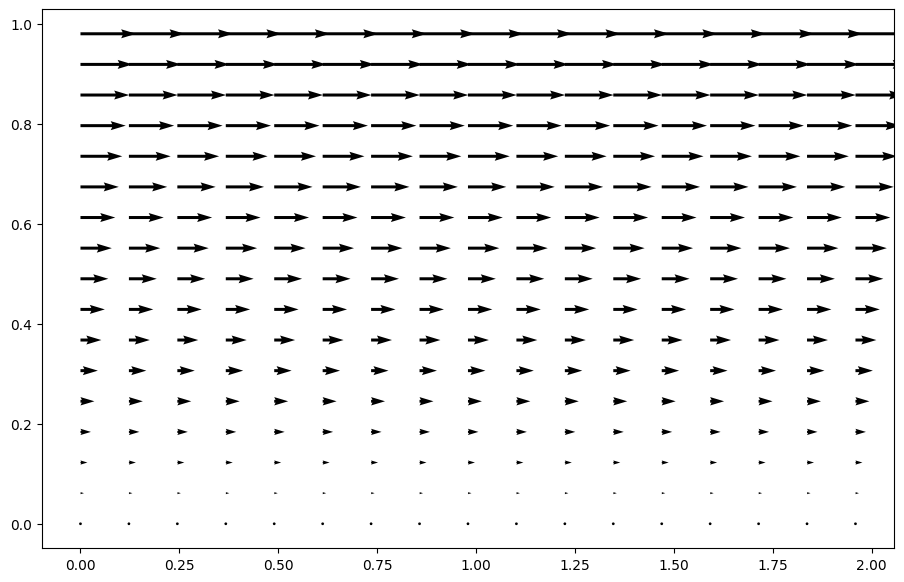

In [11]:
X, Y = np.meshgrid(np.linspace(0, Lx, nx), np.linspace(0, Ly, ny))

fig = plt.figure(figsize = (11,7), dpi=100)
plt.quiver(X[::3, ::3], Y[::3, ::3], u[::3, ::3], v[::3, ::3]);
plt.savefig('couette_flow.png')
plt.show()


The analytical solution to couette flow can be approximated via:

$$ u_{avg} = \frac{u_{top} + u_{bot}} {2} $$


In [12]:
#Analytical Comparison

u_avg = np.average(u[:,5])
u_max = u[:,5]
u_max = max(u_max)
print ('numerical average=', u_avg)
print ('numerical max=', u_max)


flow_avg = u_max / (2)
print ('analytical average=', flow_avg)

error = abs((u_avg-flow_avg)/u_avg)*100
print ('percent error=', error)

numerical average= 2.499898004977855
numerical max= 5.0
analytical average= 2.5
percent error= 0.004079967340344869
